# Regresyon

## Yapay Öğrenmenin Neresindeyiz?

![veribilimi_regresyon.png](figures/veribilimi_regresyon.png)

## Regresyon ne işe yarar

* Verileri modelleme
    * Girdi verileriyle çıktı verileri arasındaki ilişkiyi anlama
    * Bir seviyeye kadar çeşitlilik kaybını ihmal ederek bütün verileri daha az parametrelerle tanımlama
    * Verilen girdiler hakkında çıktı yorumu yapabilme
* Bilinmeyen değerleri tahminleme
    * Zamanda daha ileri veya daha geçmiş değerleri tahminleme (prediction veya ekstrapolasyon)
    * Ara değerleri tahminleme (interpolation)

## Örnek Senaryo: CO2 Salınımı

Zaman serisi örneği

- Tahmin: 2022’de Almanya’ın karbondioksit salınımı ne olacak?
- Analiz: Türkiye ile Almanya’nın karbondioksit salınımları ne zaman eşitlenir?

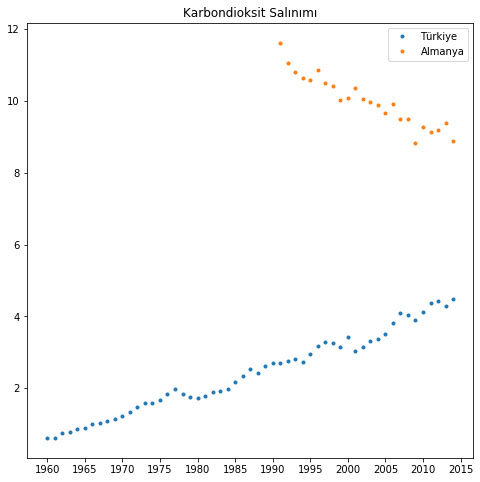

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df00 = pd.read_csv('data/CO2_emissions.csv',skiprows=4)
df00.set_index('Country Code',inplace=True)
emissions_TUR = df00.loc['TUR','1960':]
emissions_GER = df00.loc['DEU','1960':]
years = df00.head(0).columns[3:]

plt.figure(figsize=(8,8))
plt.plot(years, emissions_TUR,'.')
plt.plot(years, emissions_GER,'.')
plt.xticks(range(0,len(years),5))
plt.legend(["Türkiye", "Almanya"])
plt.title("Karbondioksit Salınımı")
plt.show()

## Örnek Senaryo: Ekonomik durumun asayişe etkisi

Korelasyon örneği

- Modelleme: Cinayet oranlarıyla fakirlik oranı veya işsizlik oranı arasında bir ilişki kurulabilir mi?
- Tahmin: Bir yerdeki halkın %20'si 5000 dolar altında kazanıyorsa, buradaki cinayet oranı nasıl tahminlenir?
- Analiz: Fakirlikle işsizlik arasında bir bağlantı kurulabilir mi?

C:\Users\emiablog\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


   index  inhabitants  poverty rate  unemployed rate  murder rate
0      1       587000          16.5              6.2         11.2
1      2       643000          20.5              6.4         13.4
2      3       635000          26.3              9.3         40.7
3      4       692000          16.5              5.3          5.3
4      5      1248000          19.2              7.3         24.8


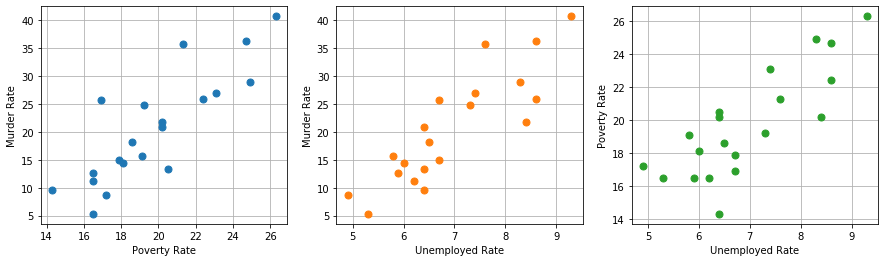

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df01 = pd.read_csv('data/poverty.csv', skiprows=36, header=None, delimiter="  ",
                   names=['index', 'inhabitants', 'poverty rate', 'unemployed rate', 'murder rate'])
print(df01.head())

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.grid()
plt.plot(df01['poverty rate'],df01['murder rate'],'.',markersize=14)
plt.xlabel('Poverty Rate')
plt.ylabel('Murder Rate')
plt.subplot(132)
plt.grid()
plt.plot(df01['unemployed rate'],df01['murder rate'],'.C1',markersize=14)
plt.xlabel('Unemployed Rate')
plt.ylabel('Murder Rate')
plt.subplot(133)
plt.grid()
plt.plot(df01['unemployed rate'],df01['poverty rate'],'.C2',markersize=14)
plt.xlabel('Unemployed Rate')
plt.ylabel('Poverty Rate')
plt.show()

## Doğrusal regresyon (Linear regression)

- Doğrusal (lineer) regresyon bir **denetimli öğrenme (supervised learning)** yöntemidir.
- Regresyonda amaç iki farklı veri arasındaki **ilişkiyi (model)** tanımlayabilmektir. 
- Doğrusal regresyonda ise iki (veya daha çok) veri arasındaki ilişkinin **bir doğru (veya düzlem) ile ifade** edilebileceği farzedilir.

### Örnek Veriler

[[ 0.    4.75]
 [ 1.    3.9 ]
 [ 2.    2.1 ]
 [ 3.    1.1 ]
 [ 4.    0.3 ]
 [ 5.   -1.2 ]
 [ 6.   -2.2 ]]


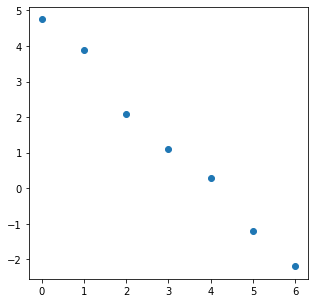

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6]).reshape(7,1)
y = np.array([4.75, 3.9, 2.1, 1.1, 0.3, -1.2, -2.2]).reshape(7,1)

data1 = np.concatenate((x,y), axis=1)
print(data1)

plt.figure(figsize=(5,5))
plt.plot(data1[:,0],data1[:,1],'o')
plt.show()

Şekildeki veriler, sanki az bir hata ile bir doğru üzerine kondurulabilir gibi görülüyor. Doğrusal regresyon, bu doğrunun en uygun nasıl yerleştirilebileceği sorusunu yanıtlamaya ve yeni gelecek girdi verilerin yüksek olasılıkla hangi çıktıları sağlayacağını söylemeye çalışır.

## Doğru nedir?

Önce bir doğru denklemini hatırlayalım: $y = b_1 x + b_0$.
- $x$: Girdi verileri (bağımsız)
- $y$: Çıktı verileri (bağımlı)
- $b_1$: Doğrunun eğimi
- $b_0$: Kesim noktası

Şimdi de $b_0$ ve $b_1$'in farklı değerleri için bu doğrunun nasıl yerleştirileceğini izleyelim.

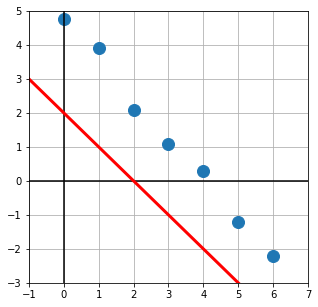

In [9]:
# interaktif dogru gosterme
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np

%matplotlib inline

N_samples = 25
linex = np.array([-1,7])

def func(b1,b0):
    plt.figure(figsize=(5,5))
    plt.plot(data1[:,0], data1[:,1],linewidth = 0,marker="o",markersize=12)
    plt.ylim(-3,5)
    plt.xlim(-1,7)
    plt.axvline(color='k')
    plt.axhline(color='k')
    liney = b1* linex + b0
    plt.plot(linex,liney,c = 'r',linewidth=3)
    plt.grid(True,axis='both')
    plt.show()
    return True

ret=interactive(func,b1 = (-2,1,.1), b0= (-1,5,.1))
              
display(ret)

## Modelleme

Amacımız bu verilerin üzerine bir doğru oturtmak. Daha iyi bir tabirle, bu verilerin aslında bir doğrudan üretildiğini (generation) söyleyebiliriz, yani **verilerimizi bir doğruyla modelliyoruz**. Verileri modelleyebileceğimiz en uygun doğru, gerçek veriler ile doğru ile tahmin edilenler arasındaki uzaklığın en düşük olacağı doğrudur. Bu uzaklığa **hata** veya **benzerlik**, bütün verilerin yaptığı hataların toplamına da **hata fonksiyonu** veya **loss function** diyoruz. Bu fonksiyonlar bizlere verilerin verilen modellere ne kadar uyumlu olup olmadığını söylemektedir.

Regresyonda her veri, belirli bir model parçasının gürültülü hali olarak kabul edilir. Amaçlardan başka bir de ana modelin ve gürültünün nasıl olması gerektiğine karar vermek olacaktır.

$y_i = b_1 x_i + b_0 + \epsilon_i$.

Örnek olarak eğer gürültü normal dağılım olarak düşünülüyorsa, yukarıdaki tabir aşağıdaki şekilde de yazılabilir.

$y_i \sim \mathcal{N}(b_1 x_i + b_0; R)$

Şimdi de bu $\epsilon_i$ değerlerinin neye denk geleceğini ve bunları nasıl ölçeceğimizi görelim.

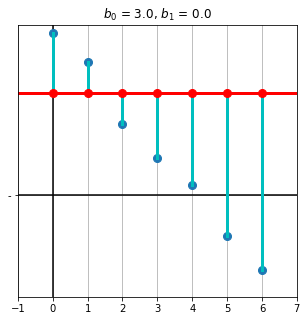

MAE:  2.5071428571428567
RMSE:  2.9340975736039474


In [6]:
# residuallari detayli inceleme
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np

%matplotlib inline

def func(b1,b0):
    plt.figure(figsize=(5,5))
    
    plt.xlim(-1,7)
    plt.ylim(-3,5)
    linex = np.array([-1,7])
    liney = b1* linex + b0
    plt.axvline(color='k')
    plt.axhline(color='k')
    plt.plot(linex,liney,c = 'r',linewidth=3)
    plt.plot(data1[:,0], data1[:,1], linewidth = 0,marker="o",markersize=8)
   
    absErr = 0
    squErr = 0
    y_hat = b1* data1[:,0] + b0
    absErr = np.sum((np.abs(y_hat - data1[:,1]))) / x.shape[0]
    squErr = np.sqrt(np.sum((y_hat - data1[:,1])**2)/ x.shape[0]) 
    for i in range(x.shape[0]):
        plt.plot([data1[i,0],data1[i,0]],[y_hat[i], data1[i,1]],'c','-', linewidth=3)
    plt.plot(data1[:,0], y_hat, 'ro', markersize=8)
    plt.title('$b_0$ = %s, $b_1$ = %s' % (b0, b1))
    plt.grid(True,axis='both')
    plt.show()
    print("MAE: ",absErr)
    print("RMSE: ",squErr)
    return True

ret=interactive(func,b1 = (-2,2,.1), b0= (0,6,.1))
              
display(ret)

## Ölçme

Yukarıdaki örnekte iki çok popüler hata fonksiyonu kullanılıyor: Mean Absolute Error (MAE - ortalama mutlak hata) ve Root Mean Squared Error (RMSE - ortalama kare hata kökü). İki yöntem de farklı uygulamalarda kullanılabilmektedir. Çalışmamıza RMSE kullanarak devam edeceğiz.

$(R)MSE = \sqrt{\frac{1}{N}\sum_{i=0}^{N} (\hat{y}_i - y_i)^2} $

$MAE = \frac{1}{N}\sum_{i=0}^{N} |\hat{y}_i - y_i | $

Hata fonksiyonları verdiğimiz doğrusal modeli değerlendirmemizi ve bu değerlendirmeye göre parametreleri ($b_1$ ve $b_0$) uygun olarak seçmemizi sağlıyor.

Bu doğruyu, daha doğrusu doğruyu tanımlayan parametreleri, her zaman elimizle bulmamız her zaman mümkün değil. Bunun yerine eniyileme (optimizasyon) yöntemlerini kullanacağız.

## Hata inceleme

Regresyonda amaç hata fonksiyonunun en düşük sonucuna (noktasına) ulaşıp, bu noktayı sağlayan fonksiyon parametrelerini elde etmektir. Öncelikle hata fonksiyonunu inceleyelim. Hata fonksiyonunu $b_1$ ve $b_0$ cinsinden yazalım ve bu parametrelerin farklı değerleri için inceleyelim.

Bu örnek özelinde, $RMSE$'yi bir fonksiyon olarak kullanacağız ve $RMSE$'nin **en düşük** değeri almasını sağlayan parametreleri arıyor olacağız. Yani,

$ \begin{align}
f_{MSE}(x,y,b_1,b_0) &= \sqrt{\frac{1}{N}\sum_{i=0}^{N} (\hat{y}_i - y_i)^2}\\
& = \sqrt{\frac{1}{N}\sum_{i=0}^{N}(b_1 x_i + b_0 - y_i)^2}
\end{align}$

RMSE:  1.0077505765266503


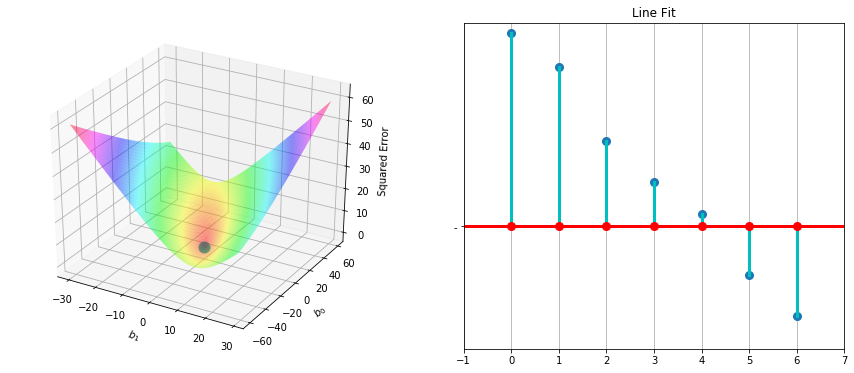

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def func(B1, B0):
    B0_r = np.arange(-60.0,60,1)
    B1_r = np.arange(-30,30,1)
    xv, yv = np.meshgrid(B1_r,B0_r, indexing='ij')

    zv = np.zeros(xv.shape)
    for i in range(xv.shape[0]):
        for j in range(xv.shape[1]):
            y_hat = xv[i,j] * data1[:,0] + yv[i,j]
            zv[i,j] = np.sqrt(np.sum((y_hat - data1[:,1])**2)) / x.shape[0]
    
    y_hat = B1 * data1[:,0] + B0
    Z = np.sqrt(np.sum((y_hat - data1[:,1])**2)) / x.shape[0]
    # plt.contour(xv,yv,zv)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(xv,yv,zv, rstride=1, cstride=1,
                    cmap='hsv', edgecolor='none', alpha=.5)
    ax.scatter(B1, B0, Z, c = 'c', s=11**2, alpha=1)
    ax.set_xlabel('$b_1$')
    ax.set_ylabel('$b_0$')
    ax.set_zlabel('Squared Error')

    
    ax2 = fig.add_subplot(122)

    ## plotting the fitted line
    # set limits
    xlimits =(-1,7)
    ylimits =(-3,5)
    ax2.set_ylim(ylimits)
    ax2.set_xlim(xlimits)

    # show data
    ax2.plot(data1[:,0], data1[:,1],linewidth = 0,marker="o",markersize=8)
    linex = np.array(xlimits)
    liney = B1* linex + B0
    ax2.plot(linex,liney,c = 'r',linewidth=3)
    ax2.grid(True)
    ax2.set_title('Line Fit')
    for i in range(x.shape[0]):
        plt.plot([data1[i,0],data1[i,0]],[y_hat[i], data1[i,1]],'c','-', linewidth=3)
    plt.plot(data1[:,0], y_hat, 'ro', markersize=8)
    plt.grid(True,axis='both')
    print("RMSE: ",Z)
    plt.show()
    return True

ret=interactive(func,B0 = (-10.0,10,.2), B1= (-10,10,.2))
              
display(ret)

## En İyileme (Optimization)

Yakıştıracağımız doğruların en iyisine hata fonksiyonunun ($f_{MSE}$) değerlerine göre karar veriyoruz. Hata fonksiyonunun en düşük düşük noktasını sağlayan doğru parametrelerini seçmek istiyoruz. Bu en düşük noktayı bulma işlemine en iyileme (optimizasyon) diyoruz. Bu en iyileme şekli hatayı en düşük seviyeye ulaştıran (minimization) veya kazancı en yüksek seviyeye ulaştıran (maximization) şeklinde olabilir. Genellikle de aşağıdaki matematiksel şekilde yazılır.

$ \max f(x,y) \\
s.t. \\
~~~~ x < a_0, \\
~~~~ y > b_0$

Yukarıdaki problem $f$ fonksiyonu doğrusal bir fonksiyonsa lineer optimizasyon yöntemleri kullanılarak çözülebilir.

Ancak her problem için bizi en iyi sonuca (optimum) götürecek bir algoritma olmayabilir. Bu durumda **yinelemeli (iterative) yöntemler** kullanılabilir. Yinelemeli yöntemler bir sonraki adımda hatayı daha düşük veren parametreleri arama şeklinde çalışır. Yinelemeli yöntemlere örnekler:

- Bayır İnişi (Gradient Descent)
- Benzetilmiş Tavlama (Simulated Annealing)
- Evrimsel Algoritmalar (Evolutionary Algorithms)
- Yapay Sinir Ağları (Artificial Neural Networks)
- K-means
- Expectation Maximization
- Variational Bayes

## Bayır inişi (Gradient Descent)

- Bir katsayı değerinden başlayıp, hatayı azaltacak yönde ilerleriz.
- Hata değişmemeye başladığı noktadaki katsayılar hatayı en aza indirecek katsayılar olacaktır.

![gradient_descent.png](figures/gradient_descent.png)

##  En Küçük Kareler Yöntemi (Least Squares Method) ve $polyfit()$

Yukarıdaki problemin hata fonksiyonu özel bir fonksiyon (konveks) olduğu için yinelemeli olmayan doğrudan uygulayabileceğimiz bir algoritma var: **En küçük kareler yöntemi** (Least squares method)

Çözüm aslında $f$ fonksiyonunun $b_1$ ve $b_0$'ye göre türev alınmasından ibaret, ama yine de matematiksel olarak karmaşık ifadeler içermekte.

$ \frac{\partial f}{\partial b_i} = -2 \sum_i r_i \frac{\partial f(x_i, b_1, b_0)}{\partial b_i} = 0$

Yukarıdaki parçalı türevlerden $b_i$ değerlerini çektiğimizde aşağıdaki matris operasyonuna ulaşıyoruz. Aradaki adımları biraz cebir içerdiği için atlıyoruz.

$ \mathbf{b} = (X^T X)^{-1} X^T \mathbf{y}$

Yukarıdaki örneği "En küçük kareler yöntemi" ile çözmeye çalışalım. Matrislerin nasıl oluşturulduğunu da yine aynı örnekte görebileceğiz.

### Girdi matrisi oluşturma ($X$)

Önce $X$ matrisini oluşturacağız. Bu matris girdi (input) verilerinden oluşuyor olacak. Her satır bir veri ve bir **bias** terimi içerecek. **Bias** girdi katsayıları $1$'dir. Bunları $b_i$ değerlerinin çarpıldığı $x$ değerleri olarak da düşünebilirsiniz. $b_0$ yani **bias** katsayısı karşısında herhangi bir veri olmadığı için burasının varsayılan değeri $1$'dir. Bir doğru denkleminin iki tane parametresi olduğu için $X$ matrisi de iki sütunlu olacak ve veri sayısı kadar satırı olacak.

In [7]:
sample_size = data1.shape[0]

X = np.concatenate((np.ones((sample_size,1)),data1[:,0].reshape(sample_size,1)),axis=1)
y = data1[:,1]

print(X)
print(y)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
[ 4.75  3.9   2.1   1.1   0.3  -1.2  -2.2 ]


In [8]:
print(X)

# 1. derece
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)

print(b)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
[ 4.76964286 -1.17321429]


Aynı şeyi bir NumPy fonksiyonu olarak da görebiliyoruz.

In [9]:
b = np.polynomial.polynomial.polyfit(data1[:,0], data1[:,1], 1)
print(b)

[ 4.76964286 -1.17321429]


## Residual (hata) incelemesi

Çıkan sonucumuzu ekrana çizdirelim, toplam hataya ve hata dağılımına bakalım. Daha sonra benzeri şekilde kullanacağımız için bunu bir fonksiyona dönüştürebiliriz.

- Elde ettiğimiz doğru modelinin ne kadar gerçekçi olduğunu görmek için veri noktalarının tahminleriyle gerçekleri arasındaki “residual”lara bakabiliriz.
- Regresyon ile hatayı minimize etmemize rağmen bu yöntemin uygun olup olmadığına ayrıca karar vermek için başka incelemelerde bulunmalıyız.
- Residualları çizdirdiğimiz zaman $x$ ekseninin etrafında ve her yerde eşit olarak dağımış bir tüneli andırması öncelikli istenen bir görseldir.

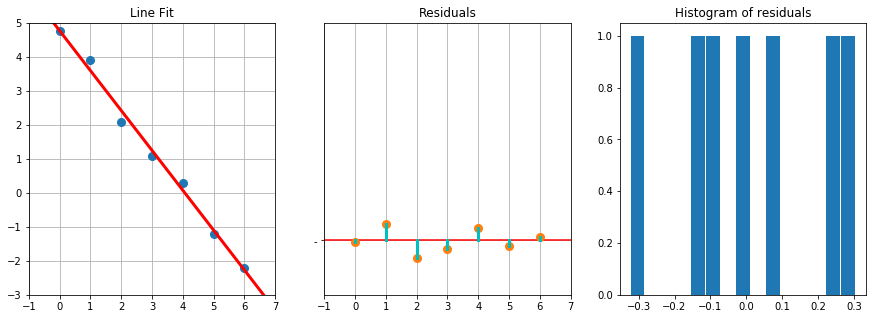

MAE:  0.17040816326530553
RMSE:  0.07625289747398348


In [10]:
%matplotlib inline

def linear_univariate_regression(data, xlimits, ylimits):

    # prepare X and y matrices
#     X = np.concatenate((np.ones((data.shape[0],1)), data[:,:1]),axis=1) #
#     y = data[:,1:2]
    
    # find line coefficients 
#     b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
    b = np.polynomial.polynomial.polyfit(data[:,0], data[:,1], 1)
    
    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    ## plotting the fitted line
    # set limits
    axes[0].set_ylim(ylimits)
    axes[0].set_xlim(xlimits)

    # show data
    axes[0].plot(data[:,0], data[:,1],linewidth = 0,marker="o",markersize=8)
    linex = np.array(xlimits)
    liney = b[1]* linex + b[0]
    axes[0].plot(linex,liney,c = 'r',linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Line Fit')

    ## plot residuals
    axes[1].set_ylim((0-(ylimits[1]+ylimits[0])/2, (ylimits[1]-ylimits[0])/2 ))
    axes[1].set_xlim(xlimits)
    y_hat = np.zeros(data[:,0].shape)

    # calculate error
    absErr = 0
    squErr = 0
    for i in range(data.shape[0]):
        x_ori = data[i,0]
        y_ori = data[i,1]
        y_hat[i] = b[1]* x_ori + b[0]
    absErr = np.sum(np.abs(y_hat - data[:,1]))/data.shape[0]
    squErr = np.sqrt(np.sum(np.square(y_hat - data[:,1])))/data.shape[0]
    
    # plot residuals
    axes[1].plot(xlimits,[0,0],'r')
    axes[1].plot(data[:,0],data[:,1]-y_hat,'o')
    axes[1].plot(data[:,0],data[:,1]-y_hat,'o', markersize=8)
    for i in range(data.shape[0]):
        axes[1].plot([data[i,0],data[i,0]],[0, data[i,1]-y_hat[i]],'c','-', linewidth=3)
    axes[1].grid(True, which='both')
    axes[1].set_title('Residuals')

    # show residual histograms
    axes[2].hist(data[:,1]-y_hat, rwidth=.9,bins=15)
    axes[2].set_title('Histogram of residuals')

    plt.show()
    print("MAE: ",absErr)
    print("RMSE: ",squErr)

linear_univariate_regression(data1, (-1,7), (-3,5))

## $R^2$ Ölçütü

Modelimizin genel isabet oranını ölçmek için R-Kare (R-Squared) yöntemi kullanılır. Aşağıdaki formülle hesaplanır:

   ### $R^2 = \frac{TSS - RSS}{TSS}$

- TSS: toplam kareler toplamı

    $TSS = \sum\limits_{i=1}^N (y_i - \bar{y})^2$
- RSS: residual kareleri toplamı

    $RSS = \sum\limits_{i=1}^N (y_i - \hat{y}_i)^2$




- Oturtulan doğruların ne kadar başarılı olduğunu belirten bir ölçüt olarak $R^2$ yöntemi kullanılır. Ölçüm ne kadar 1'e yakınsa o kadar başarılı bir operasyon yapmışızdır.
- Bu değere ayrıca “tanımlanan çeşitliliğin oranı” (fraction of the explained variance) da denir.
- Regresyonu değerlendirebilmek için hem R-kare istatistiğine hem de residual grafiklerine bakmak gerekir.

In [11]:
## Önce tekrar fit çalıştıralım
b = np.polynomial.polynomial.polyfit(data1[:,0], data1[:,1], 1)

def r_squared(data, b):

    # Toplam kareler toplamı
    TSS = np.sum((data[:,1] - np.mean(data[:,1]))**2)

    # Residual kareler toplamı
    y_hat = b[1]*data[:,0] + b[0]
    RSS = np.sum((data[:,1] - y_hat)**2)

    R2 = (TSS - RSS)/TSS
    return round(R2,4)
print(r_squared(data1, b))

0.9927


## Örnekler

### Sentetik veriler

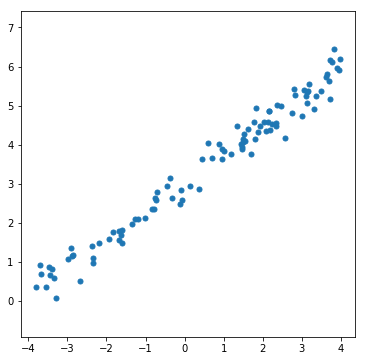

In [30]:
# sentetik veri üretimi
import numpy as np
import matplotlib.pyplot as plt
meyil = .75
kesim = 3

inData = np.random.rand(100)*8 -4
gurultu = np.random.normal(0,.25,100)
outData = meyil * inData + kesim + gurultu

data2 = np.concatenate((inData.reshape(100,1),outData.reshape(100,1)),axis=1)

# basit görselleme
#%matplotlib notebook

plt.figure(figsize = (6,6))
# plt.plot([-6, 6],[meyil*-6 + kesim, meyil*6 + kesim], 'r', linewidth=3)
plt.plot(data2[:,0], data2[:,1], '.', markersize=10)
plt.axis('equal')
plt.show()

In [31]:
# interaktif dogru gosterme
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np

%matplotlib inline

N_samples = 25
linex = np.array([-4,7])

def func(b1,b0):
    plt.figure(figsize=(5,5))
    plt.plot(data2[:,0], data2[:,1],linewidth = 0,marker=".",markersize=8)
    plt.ylim(-1,7)
    plt.xlim(-4,4)
    plt.axvline(color='k')
    plt.axhline(color='k')
    liney = b1* linex + b0
    plt.plot(linex,liney,c = 'r',linewidth=3)
    plt.grid(True,axis='both')
    plt.show()
    return True

ret=interactive(func,b1 = (-10,10,.25), b0= (-10,10,.5))
              
display(ret)

interactive(children=(FloatSlider(value=0.0, description='b1', max=10.0, min=-10.0, step=0.25), FloatSlider(va…

In [32]:
# X = np.concatenate((np.ones((data2.shape[0],1)), data2[:,:1]),axis=1) #
# y = data2[:,1:2]

b = np.polynomial.polynomial.polyfit(data2[:,0], data2[:,1], 1)
print("b = ", b.T)
# b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)
# print("b = ", b.T)

b =  [3.03908224 0.72266806]


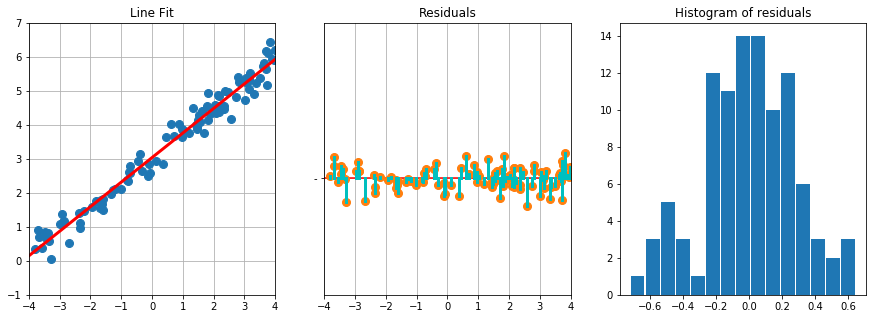

MAE:  0.22193668015523862
RMSE:  0.02781334621097826


In [33]:
linear_univariate_regression(data2, (-4,4), (-1,7))

In [34]:
print(r_squared(data2, b))

0.9736


### Gerçek veri örneği 1

Aşağıdaki örnek ev kedilerinden toplanmış verileri içeriyor. Her kedinin vücut ağırlığı ve kalp ağırlıkları kaydedilmiş. Bu verilerin belirli bir doğruya bağlı olup olmadığını araştıracağız.

In [17]:
import pandas as pd

df1 = pd.read_csv('data/catsM.csv')
df1.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,M,2.0,6.5
1,2,M,2.0,6.5
2,3,M,2.1,10.1
3,4,M,2.2,7.2
4,5,M,2.2,7.6


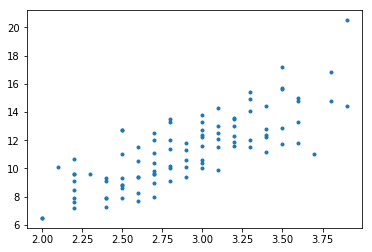

In [18]:
plt.plot(df1['Bwt'],df1['Hwt'],'.')
plt.show()

Bu veriler üzerine koyabileceğimiz regresyon doğrusunu bulalım ve izleyelim.

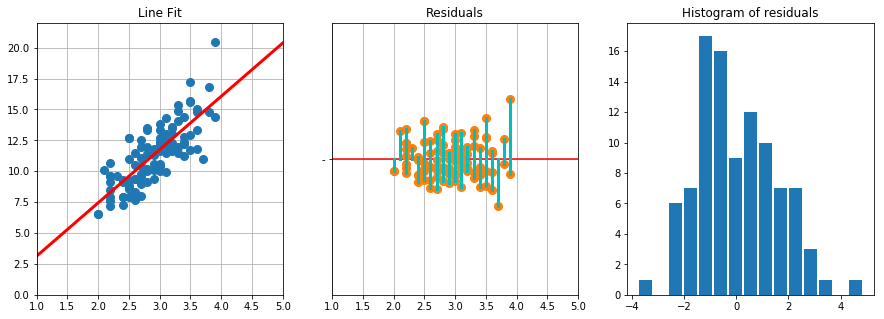

MAE:  1.272930619031876
RMSE:  0.15643592963077713
R_sq: 0.6289


In [35]:
data3 = np.array(df1[['Bwt','Hwt']])

linear_univariate_regression(data3, (1,5), (0,22))
b = np.polynomial.polynomial.polyfit(data3[:,0], data3[:,1], 1)
print("R_sq:", r_squared(data3, b))

### Gerçek veri örneği 2

Aşağıdaki örnek ise bir zaman serisini içeriyor. Dünya üzerindeki bir noktada yılın her günü sıcaklık ölçümleri alınmış. Bu ölçümlere göre doğrusal regresyon kullanarak sıcaklıkları zamana göre bir fonksiyon halinde yazmak istiyoruz.

In [20]:
import pandas as pd

df2 = pd.read_csv('data/temps.csv')
df2.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


Verilerimizi aynı şekilde iki kolonlu bir matris haline getirelim. Matrisimizin ilk kolonu girdi verilerini, yani yılın gününü, ikinci kolonu ise fahrenheit cinsinden sıcaklık değerlerini içerecek.

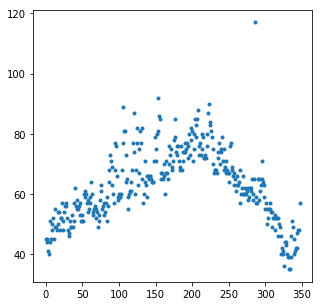

In [21]:
x_range = np.floor(np.arange(0,df2.shape[0])).reshape(348,1)
y_range = np.array(df2[['temp_1']]).reshape(348,1)

data4 = np.concatenate((x_range, y_range), axis=1)
plt.figure(figsize=(5,5))
plt.plot(x_range, y_range,'.')
plt.show()

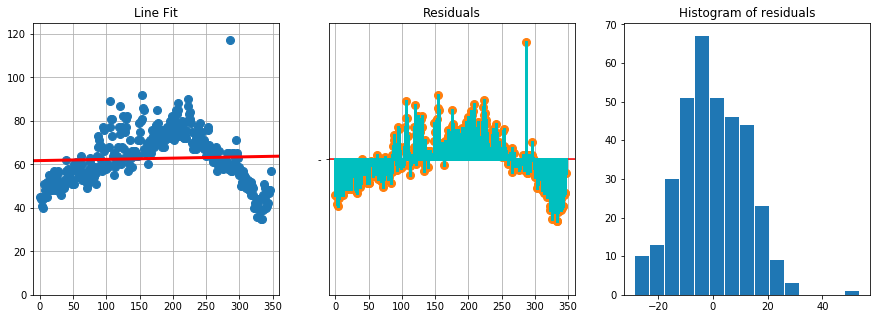

MAE:  9.775018825045246
RMSE:  0.6480890623304941
R_sq: 0.0022


In [22]:
linear_univariate_regression(data4, (-10,360), (0,125))
b = np.polynomial.polynomial.polyfit(data4[:,0], data4[:,1], 1)
print("R_sq:", r_squared(data4, b))